In [1]:
# Import the relevant modules
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from scipy.stats import pearsonr
from sklearn.utils import resample

In [2]:
# import sys
# sys.path.append('../dictionaries')
# sys.path.append('../functions')

# Import the relevant libraries
import dictionaries
import functions
import NAO_Matching

In [3]:
# First import the observation dataset
obs = xr.open_dataset(dictionaries.obs_long, chunks={'time': 10})

# Now import the model data
# Using the load_ensemble_members function from functions.py
datasets_by_model = functions.load_ensemble_members(dictionaries.JASMIN_ind_dir, dictionaries.models)

In [4]:
# Process the observations to get the NAO index
obs_nao_anom, obs_time = functions.process_observations(obs)

# Now process the model data
model_time_by_model, model_nao_anom_by_model = functions.process_ensemble_members(datasets_by_model)

(56,)
(56,)


In [5]:
# Specify the number of members to select for NAO-matching
n_members = 20

# Set up the years to plot
# in datetime format
# from 1966 to 2019
years = pd.date_range(start='1966', end='2019', freq='YS')
print("Years to plot: ", years)

# # Call the NAO-matching plotting function
# NAO_Matching.plot_NAO_matched(dictionaries.models, model_time_by_model, model_nao_anom_by_model, obs_nao_anom, obs_time, years, n_members)

Years to plot:  DatetimeIndex(['1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01'],
              dty

Lagged years to plot:  DatetimeIndex(['1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')
ensemble_membe

/home/users/benhutch/multi-model/multi-model-jasmin/NAO_Matching.py:722: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_members_array = np.array(results_members)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


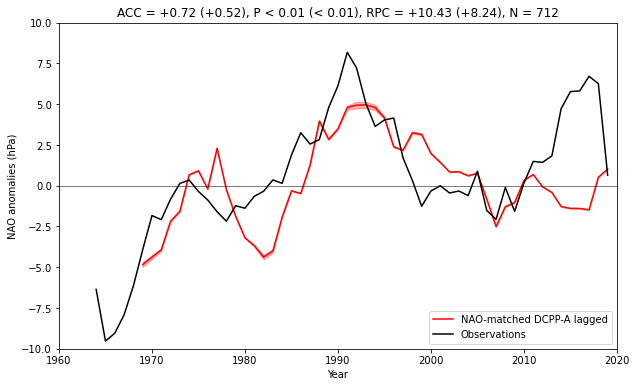

In [6]:
# Set up the lag
lag = 4

# set up the lagged year data 
lagged_years = pd.date_range(start='1969', end='2019', freq='YS')
print("Lagged years to plot: ", lagged_years)

# Now call the NAO-matched lag function
NAO_Matching.plot_NAO_matched_lagged(dictionaries.models, model_time_by_model, model_nao_anom_by_model, obs_nao_anom, obs_time, lagged_years, n_members, lag)